# Pandas 101

In [1]:
import numpy as np
import pandas as pd

## Series

- 1次元配列のようなオブジェクト
 - Numpyが持つデータ型のデータ配列
 - Index
    - デフォルトのインデックスは0からN-1の連番
<br><br>
- インデックスとデータ値がマッピングされた、**固定長の順序付きディクショナリ**
 

## DataFrame

- テーブル形式のスプレッドシート風のデータ構造
 - 行と列の両方にインデックスを持つ
<br><br>
- Series型の値を持つ、ディクショナリ(Key-Value)ともみなせる

## info (型とサイズ)

In [2]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, one to three
Data columns (total 3 columns):
col1    3 non-null int32
col2    3 non-null int32
col3    3 non-null int32
dtypes: int32(3)
memory usage: 60.0+ bytes


In [4]:
df.memory_usage()

Index    24
col1     12
col2     12
col3     12
dtype: int64

- int32(4 bytes) * 9 => 36 bytes
- Index 24 bytes

In [5]:
from sys import getsizeof
print( getsizeof( df.values) )  # 解釈できていません
print( df.values.__sizeof__() ) # 上記と同じ
print( df.values.nbytes ) # 36 bytes

112
112
36


## インデックス参照 (ix)

- ix is deprecated. Please use => 今後廃止される予定、（こちらでは、ラベルによる指定も、位置による指定も使用できる）
 - loc for label based indexing or => ラベルで指定する場合
 - iloc for positional indexing => 位置で指定する場合

### loc
- loc, iloc では必ず、行(と列)で指定をしなければならない
 - 行、列の順で指定
 - 列は省略可能
 - ndarrayと同様なスライス処理が可能 => ex. ["one":"two"] => **※ 終端の値も含まれる**
 - ndarrayと同様なファンシーインデックスが可能 => ex. [["one","three"]]

In [77]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [78]:
df.loc["one"]

col1    0
col2    1
col3    2
Name: one, dtype: int32

In [79]:
df.loc["one":"two"]

,col1,col2,col3
one,0,1,2
two,3,4,5


In [80]:
df.loc[:,"col1"]

one      0
two      3
three    6
Name: col1, dtype: int32

In [10]:
df.loc[:,"col1":"col2"]

,col1,col2
one,0,1
two,3,4
three,6,7


In [11]:
df.loc[["one","three"]]

,col1,col2,col3
one,0,1,2
three,6,7,8


In [12]:
# df.loc["col1"]  # 列だけの指定はNG
# df.loc[1,1]  # 位置による指定はNG

### iloc
- loc, iloc では必ず、行(と列)で指定をしなければならない
 - 行、列の順で指定
 - 列は省略可能
 - ndarrayと同様なスライス処理が可能 => ex. [1:2] => **※ 終端の値は含まれない**
 - ndarrayと同様なファンシーインデックスが可能 => ex. [["one","three"]]

In [13]:
df.iloc[1,1]

4

In [14]:
df.iloc[0]

col1    0
col2    1
col3    2
Name: one, dtype: int32

In [15]:
df.iloc[1:2]

,col1,col2,col3
two,3,4,5


In [16]:
df.iloc[:,1:3]

,col2,col3
one,1,2
two,4,5
three,7,8


In [17]:
df.iloc[[0,2]]

,col1,col2,col3
one,0,1,2
three,6,7,8


In [85]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [91]:
df.loc["one"]

col1    0
col2    1
col3    2
Name: one, dtype: int32

## index

- **DataFrameにおいて、indexは 列方向、縦方向、axis=1**
- Seriesにおいては、方向がないので、単に順番
- index を指定しない場合、0からの連番が自動的に採番される
 - index を指定することは、この自動採番の数字にラベルを付けること
 - **index とは別に数字で指定できる位置情報は別途持っている => iloc (Integer location ???) **
<br><br> 
- index のラベルの変更は、リストでの一括で変更はできるが、個別には変更はできない(mutable)

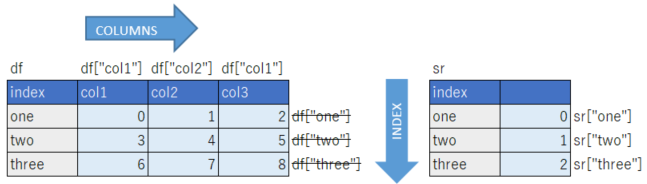

In [198]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [199]:
df.index

Index(['one', 'two', 'three'], dtype='object')

In [200]:
df.index = ["uno","dos","tres"]
df

,col1,col2,col3
uno,0,1,2
dos,3,4,5
tres,6,7,8


In [201]:
# df.index[0] = "ONE"   # TypeError: Index does not support mutable operations

In [202]:
df

,col1,col2,col3
uno,0,1,2
dos,3,4,5
tres,6,7,8


In [22]:
for rowId in df.index: # ROWS
    print(rowId)
    for colId in df.loc[rowId].index: #COLUMNS
        print(df.loc[rowId, colId]) #CELL

uno
0
1
2
dos
3
4
5
tres
6
7
8


## columns

- colomn 列方向、横方向、axis=0
- column を指定しない場合、0からの連番が自動的に採番される
 - column を指定することは、この自動採番の数字にラベルを付けること
 - column とは別に数字で指定できる位置情報は別途持っている => **iloc (index location ???) **
<br><br> 
- columns のラベルの変更は、リストでの一括で変更はできるが、個別には変更はできない(mutable)

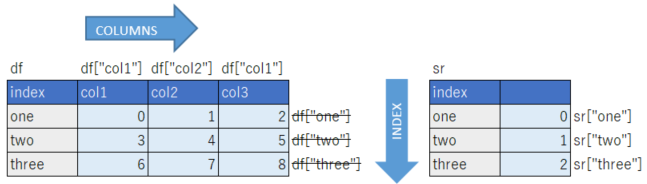

In [155]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [24]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [25]:
df.columns = ["1列","2列","3列"]
df

,1列,2列,3列
one,0,1,2
two,3,4,5
three,6,7,8


In [26]:
df.columns

Index(['1列', '2列', '3列'], dtype='object')

In [27]:
#df.columns[0] = "COL1" #  TypeError: Index does not support mutable operations

## values

- 値の部分を取り出す

In [28]:
df.values

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

## name

- name
 - objectの名前 => DataFrameオブジェクトの名前 => 注意！、命名されていないのにobj.nameすると例外が発生する => BUG!??
 - index の名前

In [29]:
# df.name  #  AttributeError: 'DataFrame' object has no attribute 'name'

In [30]:
df.name = "sampleDF"

In [31]:
df.name

'sampleDF'

In [32]:
df.index.name = "インデックス"

In [33]:
df

,1列,2列,3列
インデックス,,,
one,0,1,2
two,3,4,5
three,6,7,8


## 列操作

### [key]指定

- df[key] で指定できるのは、**列、複数の列**
 - df[key] => 列 => **DataFrameの列はディクショナリ風の参照や、属性指定でSeriesとして取り出せます**
 - df[[key1, key2]] => 複数の列
 - **iloc/locとは異なり、スライス、ファンシーインデックスはできないようです**
<br><br>
- 各列は、pd.Serial です
- **行の取り出しは、iloc/locで行う、つまり、この指定方式は使えないみたい**

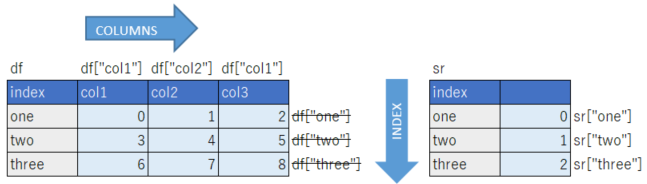

In [156]:
sr = pd.Series(np.arange(3), index=["one", "two", "three"])
sr

one      0
two      1
three    2
dtype: int32

In [157]:
sr.name = "番号"
sr

one      0
two      1
three    2
Name: 番号, dtype: int32

In [158]:
sr["three"]

2

In [159]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [160]:
df["col2"]

one      1
two      4
three    7
Name: col2, dtype: int32

In [161]:
df[["col1","col3"]]

,col1,col3
one,0,2
two,3,5
three,6,8


In [162]:
sr = df["col1"]
sr

one      0
two      3
three    6
Name: col1, dtype: int32

In [163]:
type(sr)

pandas.core.series.Series

### 列の追加 (df[key] = value)

- 列の追加をすると、元の列の後ろに追加される
- リストを追加すると、順番に応じてインデックスが振られる
- pd.Seriesを追加するには、明示的にインデックスを指定する

In [164]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [165]:
df["col0"] = [11,12,13]
df

,col1,col2,col3,col0
one,0,1,2,11
two,3,4,5,12
three,6,7,8,13


In [166]:
df["col4"] = pd.Series([11,12,13])
df

,col1,col2,col3,col0,col4
one,0,1,2,11,NaN
two,3,4,5,12,NaN
three,6,7,8,13,NaN


In [167]:
df["col5"] = pd.Series([11,12,13], index=["one","two","three"])
df

,col1,col2,col3,col0,col4,col5
one,0,1,2,11,NaN,11
two,3,4,5,12,NaN,12
three,6,7,8,13,NaN,13


In [168]:
# df.append(col1, axis=1) # ERROR

### 列の追加 (insert)

- insert
 - 追加する位置を指定して、列追加
 - 破壊的メソッド

In [169]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [170]:
df.insert(loc=1 ,value=[1,2,3], column="col4")
df

,col1,col4,col2,col3
one,0,1,1,2
two,3,2,4,5
three,6,3,7,8


### 列の追加 (concat)

- pd.concat
 - 行や列を追加する
   - 行方向 => axis=0
   - 列方向 => axis= 1
 - デフォルトは行の方向の追加( axis = 0)
 - 追加できるのは、NDFrameオブジェクト( pd.Series, pd.DataFrame )のみ

In [171]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [172]:
sr = pd.Series([11,12,13], index=["one", "two", "three"], name="col4")
pd.concat([df,sr], axis=1)

,col1,col2,col3,col4
one,0,1,2,11
two,3,4,5,12
three,6,7,8,13


In [173]:
pd.concat([df,sr], axis=0)

,col1,col2,col3,0
one,0.0,1.0,2.0,NaN
two,3.0,4.0,5.0,NaN
three,6.0,7.0,8.0,NaN
one,NaN,NaN,NaN,11.0
two,NaN,NaN,NaN,12.0
three,NaN,NaN,NaN,13.0


In [174]:
# pd.concat([df,np.array([11,12,13])]) # ERROR

### 列の削除 (drop)

- drop
 - 行や列を削除する
   - 行方向 => axis=0
   - 列方向 => axis=1
 - デフォルトでは行の削除 (axis=0)

In [175]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [176]:
df.drop("col2", axis=1)

,col1,col3
one,0,2
two,3,5
three,6,8


### 列の削除 (del)

- 破壊的メソッド、その列を削除する

In [23]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [24]:
del df["col1"]
df

,col2,col3
one,1,2
two,4,5
three,7,8


In [27]:
del df.loc["one"]

AttributeError: __delitem__

## 行操作

### 行の追加 (append)

- 多分、ndarrayが横ベクトルなので、追加は単位だと思う、
 - つまり、1つのレコードは横ベクトル
 - その集合は、行列
- append
 - df_object.append( Series(index指定), ignore_index=True) => indexが初期化される、最終行に追加される
   - name指定がない場合、ignote_index＝Trueとしなければ例外が発生する
 - df_object.append( Series(index指定, name指定)) => name指定がインデックスとなり、最終行に追加される

In [2]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [3]:
df.append(pd.Series([10,11,12], index=["col1", "col2","col3"]), ignore_index=True)

,col1,col2,col3
0,0,1,2
1,3,4,5
2,6,7,8
3,10,11,12


In [4]:
df.append(pd.Series([10,11,12], index=["col1", "col2","col3"], name="Ax"))

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8
Ax,10,11,12


### 行の追加 (concat)

- pd.concat
 - 行や列を追加する
   - 行方向 => axis=0
   - 列方向 => axis= 1
 - デフォルトは行の方向の追加( axis = 0)
 - 追加できるのは、NDFrameオブジェクト( pd.Series, pd.DataFrame )のみ

In [5]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [6]:
df2 = pd.DataFrame([[11,12,13]], index=["four"], columns=["col1","col2","col3"])
pd.concat([df,df2], axis=0)

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8
four,11,12,13


In [7]:
df2 = pd.DataFrame([[11,12,13]], index=["four"], columns=df.columns)
pd.concat([df,df2])

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8
four,11,12,13


In [8]:
df2 = pd.DataFrame([[11,12,13]], index=["four"], columns=["col1","col2","col3"])
pd.concat([df,df2], axis=1)

,col1,col2,col3,col1,col2,col3
four,NaN,NaN,NaN,11.0,12.0,13.0
one,0.0,1.0,2.0,NaN,NaN,NaN
three,6.0,7.0,8.0,NaN,NaN,NaN
two,3.0,4.0,5.0,NaN,NaN,NaN


### 行の削除 (drop) : 非破壊的メソッド

- drop
 - 行や列を削除する
   - 行方向 => axis=0
   - 列方向 => axis=1
 - デフォルトでは行の削除 (axis=0)

In [28]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [29]:
df.drop("two")

,col1,col2,col3
one,0,1,2
three,6,7,8


In [30]:
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


### ~~行の削除 (del)~~

- del は行の場合、うまくないな

In [34]:
#del df.iloc[1]

In [190]:
# del df["one"] # ERROR

## copy

In [191]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [35]:
col1 = df["col1"].copy()
col1

one      0
two      3
three    6
Name: col1, dtype: int32

## 行や列の並び替え  (reindex)

- reindex
 - 広い意味での再インデックス、つまり、行や列の並び替えをする
   - 引数として行方向の操作をする index= 
   - 引数として列方向の操作をする columns =
   - index=, columns= は同時に指定できる
   - 名前指定をしない場合、直接リストを指定する場合は、index 操作
 - その他、内挿、穴埋めのための引数 method= 、欠損値のための引数 fill_value= などがある
 - **列の追加、削除の操作としても利用できる**

In [193]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [194]:
df.reindex(columns=["col3","col1","col2"])

,col3,col1,col2
one,2,0,1
two,5,3,4
three,8,6,7


In [195]:
df.reindex(index=["two","three","one"])

,col1,col2,col3
two,3,4,5
three,6,7,8
one,0,1,2


In [196]:
df.reindex(columns=["col2","col1","col3"], index=["one","three","two","four"], fill_value=99)

,col2,col1,col3
one,1,0,2
three,7,6,8
two,4,3,5
four,99,99,99


- 列の場合は、列のリストでの指定も可能

In [197]:
df[["col1","col2","col3"]]

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


## MultiIndex

### コンストラクタ

In [123]:
df = pd.DataFrame(np.arange(12).reshape(4,3), 
                  index=[["関東","関東","関西", "関西"], ["東京", "千葉", "大阪","京都"]], 
                  columns=["好き","嫌い","興味なし"])
df

好き  嫌い  興味なし
関東 東京   0   1     2
   千葉   3   4     5
関西 大阪   6   7     8
   京都   9  10    11

In [129]:
df.index

MultiIndex(levels=[['関東', '関西'], ['京都', '千葉', '大阪', '東京']],
           labels=[[0, 0, 1, 1], [3, 1, 2, 0]])

In [128]:
df.columns

Index(['好き', '嫌い', '興味なし'], dtype='object')

In [131]:
df.loc["関東"]

,好き,嫌い,興味なし
東京,0,1,2
千葉,3,4,5


In [134]:
df.loc["関東","千葉"]

好き      3
嫌い      4
興味なし    5
Name: (関東, 千葉), dtype: int32

In [136]:
df.loc[["関東","千葉"],"好き"]

関東  東京    0
    千葉    3
Name: 好き, dtype: int32

### 列をインデックスにする
- RDB的なデータから、マルチインデックスに変換

In [153]:
data = {"地域":["関東","関東","関西","関西"], "県":["東京", "千葉", "大阪","京都"],
       "好き":[0,3,6,9], "嫌い":[1,4,7,10], "興味なし":[2,5,8,11]}
df = pd.DataFrame(data)
df

,地域,好き,嫌い,県,興味なし
0,関東,0,1,東京,2
1,関東,3,4,千葉,5
2,関西,6,7,大阪,8
3,関西,9,10,京都,11


In [148]:
df2 = df.set_index(["地域","県"])
df2

好き  嫌い  興味なし
地域 県               
関東 東京   0   1     2
   千葉   3   4     5
関西 大阪   6   7     8
   京都   9  10    11

In [150]:
df2.index

MultiIndex(levels=[['関東', '関西'], ['京都', '千葉', '大阪', '東京']],
           labels=[[0, 0, 1, 1], [3, 1, 2, 0]],
           names=['地域', '県'])

### MultiIndexの解除

In [154]:
df2.reset_index()

,地域,県,好き,嫌い,興味なし
0,関東,東京,0,1,2
1,関東,千葉,3,4,5
2,関西,大阪,6,7,8
3,関西,京都,9,10,11


## 関数の適用 (apply)

In [106]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                  index=["one", "two", "three"], columns=["col1","col2","col3"])
df

,col1,col2,col3
one,0,1,2
two,3,4,5
three,6,7,8


In [107]:
df.apply(lambda x: pd.Series([x.min(), x.max()], index=["min","max"]), axis=0)

,col1,col2,col3
min,0,1,2
max,6,7,8


In [108]:
df.apply(lambda x: pd.Series([x.min(), x.max()], index=["min","max"]), axis=1)

,min,max
one,0,2
two,3,5
three,6,8
